In [1]:
import pandas as pd
import numpy as np
from glob import glob 
import sys
sys.path += ["../src"]
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots as sbp
from sklearn.preprocessing import StandardScaler
import pickle


In [2]:
all_corrs_dist = {}

for file in sorted(glob(f'/data/housing/data/intermediate/jl_pop_synth/isp_baselines/all_baselines_*.pickle')):
    prov = file.split(".")[-2][-2:]

    with open(file, 'rb') as f:
        data = pickle.load(f)

    if "df_shuffle_cap_num" in data.keys():
        all_corrs_dist[prov] = {}

        corr_real = data["df_real"].drop(columns = ["x", "y"]).corr()

        for k in data:
            if "95" not in k:
                corr_k = data[k].drop(columns = ["x", "y"]).corr()
                dist = (np.abs(corr_real - corr_k)).sum().sum()
                all_corrs_dist[prov][k] = dist

In [3]:
df_corr = pd.DataFrame(all_corrs_dist)
df_corr.to_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_correlation_features_isp.csv")
df_corr = pd.read_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_correlation_features_isp.csv", index_col = 0)
df_corr = df_corr.drop("df_real").apply(lambda x: (x - x.mean()) / x.std())


In [4]:
df_corr.T.mean().sort_values()

df_shuffle_cap_num         -1.003065
df_shuffle_cap_bins        -0.984906
df_shuffle_province_bins   -0.727542
df_shuffle_province_num    -0.723866
df_ablation                 0.451523
df_nfvae                    0.464213
df_copula_ablation          1.260534
df_copula_nf                1.263110
dtype: float64

<Axes: >

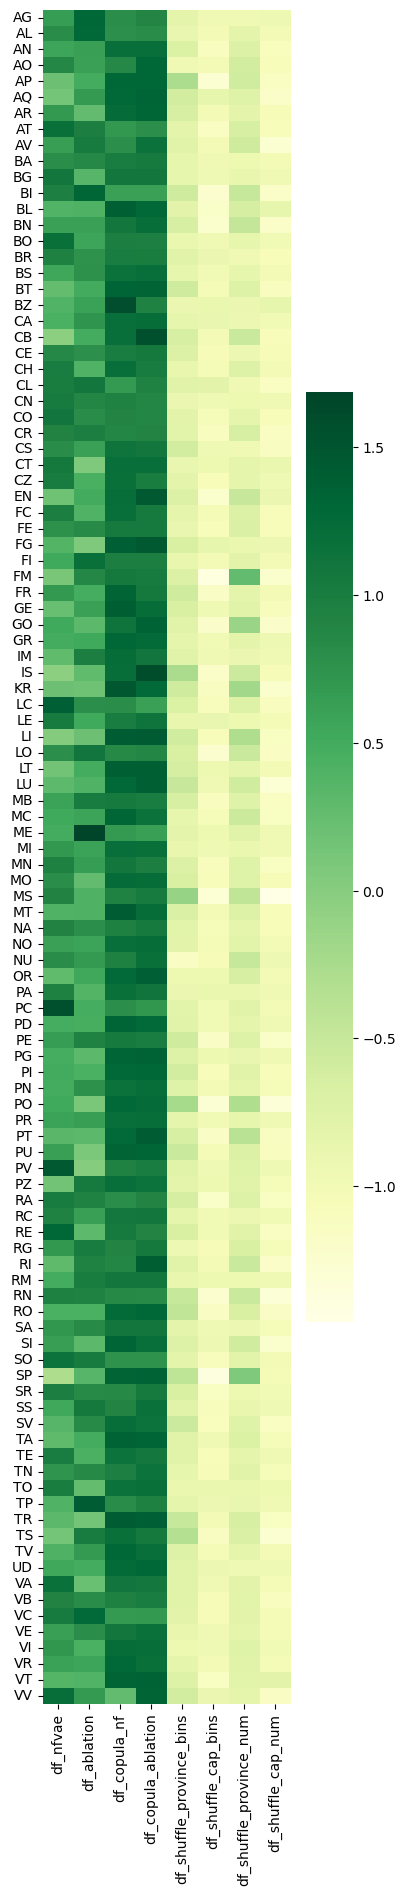

In [5]:
fig, axes = sbp(figsize = (4,22))

sns.heatmap(df_corr.T, cmap = "YlGn")

<Axes: xlabel='distance', ylabel='method'>

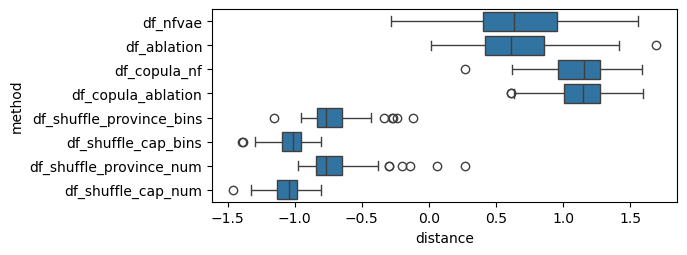

In [6]:
fig, axes = sbp(figsize = (6, 2.5))

sns.boxplot(data = df_corr.stack().reset_index().rename(columns = {"level_0": "method", 0: "distance"}), y = "method", x = "distance")